## Importings Libs

In [21]:
# Import default_timer to compute durations
from timeit import default_timer as timer
start_time=timer()

In [22]:
# Importing numpy 
import numpy as np

# Importing Scipy 
import scipy as sp

# Importing Pandas Library 
import pandas as pd

# import glob function to scrap files path
from glob import glob

# import display() for better visualitions of DataFrames and arrays
from IPython.display import display

# import pyplot for plotting
import matplotlib.pyplot as plt

plt.style.use('bmh') # for better plots

In [30]:
Raw_data_paths = sorted(glob("HAPT Data Set/RawData/*"))

In [31]:
################# Just to verify if all paths were scraped #################

# Selecting acc file paths only
Raw_acc_paths=Raw_data_paths[0:61]

# Selecting gyro file paths only
Raw_gyro_paths=Raw_data_paths[61:122]

# printing info related to acc and gyro files
print (("RawData folder contains in total {:d} file ").format(len(Raw_data_paths)))
print (("The first {:d} are Acceleration files:").format(len(Raw_acc_paths)))
print (("The second {:d} are Gyroscope files:").format(len(Raw_gyro_paths)))
print ("The last file is a labels file")

# printing 'labels.txt' path
print ("labels file path is:",Raw_data_paths[122])

RawData folder contains in total 123 file 
The first 61 are Acceleration files:
The second 61 are Gyroscope files:
The last file is a labels file
labels file path is: HAPT Data Set/RawData/labels.txt


## Define import acc and gyro files function

In [32]:
def import_raw_signals(file_path,columns):
    ######################################################################################
    # Inputs:                                                                            #
    #   file_path: A string contains the path of the "acc" or "gyro" txt file            #
    #   columns: A list of strings contains the column names in order.                   #
    # Outputs:                                                                           #
    #   dataframe: A pandas Dataframe contains "acc" or "gyro" data in a float format    #
    #             with columns names.                                                    #
    ######################################################################################


    # open the txt file
    opened_file =open(file_path,'r')

    # Create a list
    opened_file_list=[]
    
    # loop over each line in the opened_file
    # convert each element from txt format to float 
    # store each raw in a list
    for line in opened_file:
        opened_file_list.append([float(element) for element in line.split()])

    # convert the list of lists into 2D numpy array(computationally efficient)
    data=np.array(opened_file_list)


    # Create a pandas dataframe from this 2D numpy array with column names
    data_frame=pd.DataFrame(data=data,columns=columns)

    # return the data frame
    return data_frame

## Importing Files and Storing DataFrames in raw_dic

In [33]:
# creating an empty dictionary where all dataframes will be stored
raw_dic={}


# creating list contains columns names of an acc file
raw_acc_columns=['acc_X','acc_Y','acc_Z']

# creating list contains gyro files columns names
raw_gyro_columns=['gyro_X','gyro_Y','gyro_Z']

# loop for to convert  each "acc file" into data frame of floats and store it in a dictionnary.
for path_index in range(0,61):
        
        # extracting the file name only and use it as key:[expXX_userXX] without "acc" or "gyro"
        key= Raw_data_paths[path_index][-16:-4]
        
        # Applying the function defined above to one acc_file and store the output in a DataFrame
        raw_acc_data_frame=import_raw_signals(Raw_data_paths[path_index],raw_acc_columns)
        
        # By shifting the path_index by 61 we find the index of the gyro file related to same experiment_ID
        # Applying the function defined above to one gyro_file and store the output in a DataFrame
        raw_gyro_data_frame=import_raw_signals(Raw_data_paths[path_index+61],raw_gyro_columns)
        
        # concatenate acc_df and gyro_df in one DataFrame
        raw_signals_data_frame=pd.concat([raw_acc_data_frame, raw_gyro_data_frame], axis=1)
        
        # Store this new DataFrame in a raw_dic , with the key extracted above
        raw_dic[key]=raw_signals_data_frame

In [34]:
# raw_dic is a dictionary contains 61 combined DF (acc_df and gyro_df)
print('raw_dic contains %d DataFrame' % len(raw_dic))

# print the first 3 rows of dataframe exp01_user01
display(raw_dic['exp01_user01'].head(3))

raw_dic contains 61 DataFrame


,acc_X,acc_Y,acc_Z,gyro_X,gyro_Y,gyro_Z
0,0.918056,-0.112500,0.509722,-0.054978,-0.069639,-0.030849
1,0.911111,-0.093056,0.537500,-0.012523,0.019242,-0.038485
2,0.881944,-0.086111,0.513889,-0.023518,0.276417,0.006414


## Define Import_labels_file function

In [35]:
def import_labels_file(path,columns):
    ######################################################################################
    # Inputs:                                                                            #
    #   path: A string contains the path of "labels.txt"                                 #
    #   columns: A list of strings contains the columns names in order.                  #
    # Outputs:                                                                           #
    #   dataframe: A pandas Dataframe contains labels  data in int format                #
    #             with columns names.                                                    #
    ######################################################################################
    
    
    # open the txt file
    labels_file =open(path,'r')
    
    # creating a list 
    labels_file_list=[]
    
    
    #Store each row in a list ,convert its list elements to int type
    for line in labels_file:
        labels_file_list.append([int(element) for element in line.split()])
    # convert the list of lists into 2D numpy array 
    data=np.array(labels_file_list)
    
    # Create a pandas dataframe from this 2D numpy array with column names 
    data_frame=pd.DataFrame(data=data,columns=columns)
    
    # returning the labels dataframe 
    return data_frame

## Apply import_labels_file

In [37]:
#################################
# creating a list contains columns names of "labels.txt" in order
raw_labels_columns=['experiment_number_ID','user_number_ID','activity_number_ID','Label_start_point','Label_end_point']

# The path of "labels.txt" is last element in the list called "Raw_data_paths"
labels_path=Raw_data_paths[-1]

# apply the function defined above to labels.txt 
# store the output  in a dataframe 
Labels_Data_Frame=import_labels_file(labels_path,raw_labels_columns)

In [38]:
# The first 3 rows of labels dataframe
print ("The first 3 rows of  Labels_Data_Frame:" )
display(Labels_Data_Frame.head(3))
print(Labels_Data_Frame.shape)

The first 3 rows of  Labels_Data_Frame:


,experiment_number_ID,user_number_ID,activity_number_ID,Label_start_point,Label_end_point
0,1,1,5,250,1232
1,1,1,7,1233,1392
2,1,1,4,1393,2194


(1214, 5)


In [47]:
Labels_Data_Frame.describe()

,experiment_number_ID,user_number_ID,activity_number_ID,Label_start_point,Label_end_point
count,1214.000000,1214.000000,1214.000000,1214.000000,1214.000000
mean,30.945634,15.390445,5.140857,7959.962932,8630.803130
std,17.759184,8.682592,3.251851,5161.664485,5154.525121
min,1.000000,1.000000,1.000000,136.000000,1116.000000
25%,15.000000,8.000000,2.000000,3566.250000,4284.000000
50%,31.000000,15.000000,4.000000,6943.000000,7522.000000
75%,46.000000,23.000000,7.000000,12563.750000,13187.750000
max,61.000000,30.000000,12.000000,21752.000000,22540.000000


## Define Activity Labels Dic

In [39]:
# Creating a dictionary for all types of activities
# The first 6 activities are called Basic Activities as(BAs) 3 dynamic and 3 static
# The last 6 activities are called Postural Transitions Activities as (PTAs)
Acitivity_labels=AL={
        1: 'WALKING', 2: 'WALKING_UPSTAIRS', 3: 'WALKING_DOWNSTAIRS', # 3 dynamic activities
        4: 'SITTING', 5: 'STANDING', 6: 'LIYING', # 3 static activities
        
        7: 'STAND_TO_SIT',  8: 'SIT_TO_STAND',  9: 'SIT_TO_LIE', 10: 'LIE_TO_SIT', 
    11: 'STAND_TO_LIE', 12: 'LIE_TO_STAND',# 6 postural Transitions
       }

# General visualizations

### Number of rows per experience

In [41]:
# Each acc file and gyro file having the same exp_ID have also the same number of rows

# a list contains the number of rows per dataframe 
rows_per_df=[len(raw_dic[key]) for key in sorted(raw_dic.keys())]

# a list contains exp ids
exp_ids=[i for i in range(1,62)]

# useful row is row that was captured while the user was performing an activity
# some rows in acc and gyro files are not associated to an activity id

# list that will contain the number of useful rows per dataframe
useful_rows_per_df=[]

for i in range(1,62):# iterating over exp ids
    # selecting start-end rows of each activity of the experiment
    start_end_df= Labels_Data_Frame[Labels_Data_Frame['experiment_number_ID']==i][['Label_start_point','Label_end_point']]
    # sum of start_labels and sum of end_labels
    start_sum,end_sum=start_end_df.sum()
    # number of rows useful rows in [exp i] dataframe
    useful_rows_number=end_sum-start_sum+len(start_end_df)
    # storing row numbers in a list
    useful_rows_per_df.append(useful_rows_number)

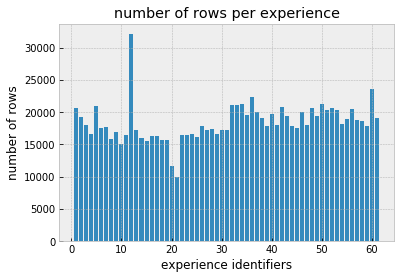

In [42]:
# visualizing row numbers per dataframe

plt.bar(exp_ids,rows_per_df) # ploting the bar plot

plt.xlabel('experience identifiers') # Set X axis info
plt.ylabel('number of rows') # Set Y axis info
plt.title('number of rows per experience') # Set the title of the bar plot
plt.show() # Show the figure

### Number of useful rows per experience (Only rows with experience or activity)

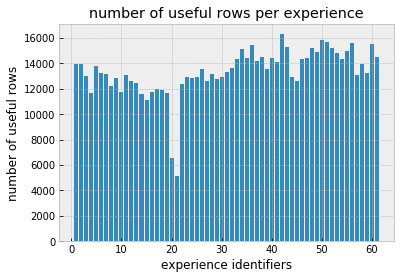

In [43]:
# visualizing useful rows per dataframe
plt.bar(exp_ids,useful_rows_per_df) # ploting the bar plot
plt.xlabel('experience identifiers') # Set X axis info
plt.ylabel('number of useful rows') # Set y axis info
plt.title('number of useful rows per experience') # Set the title of the figure
plt.show() # show the figure

### Number of Rows per activity and Mean time per activity

In [44]:
# A list will contain number of rows per activity
rows_per_activity=[]

# a list will contain the number of times each activity was performed in the protocol of all experiences
count_act=[]

for i in range(1,13):# iterating over activity ids
    # a dataframe contains start and end labels for all experiences while users were performing the same activity
    start_end_df =Labels_Data_Frame[Labels_Data_Frame['activity_number_ID']==i][['Label_start_point','Label_end_point']]
    
    # add to the list the number of times this activity was performed in all experiences
    count_act.append(len(start_end_df))
    
    # start_sum is the sum of all start_label values in start_end_df
    # end_sum is the sum of all end_label values in start_end_df
    start_sum,end_sum=start_end_df.sum()
    
    # number of rows related to the activity
    number_of_rows=end_sum-start_sum+len(start_end_df)
    
    # storing number of rows in a list
    rows_per_activity.append(number_of_rows)


# mean duration in seconds of each activity:
time_per_activity=[rows_per_activity[i]/(float(50)*count_act[i]) for i in range(len(rows_per_activity))]

# activity ids from 1 to 12
activity_ids=[i for i in range(1,13)]

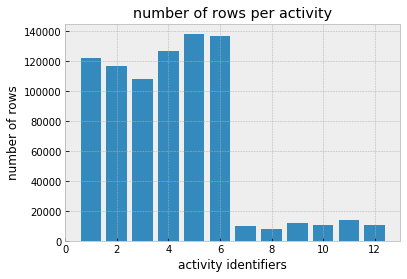

In [45]:
# visualizing the number of rows per activity
plt.bar(activity_ids,rows_per_activity) # plot bar's figure
plt.xlabel('activity identifiers') # Set x axis info
plt.ylabel('number of rows') # Set y axis info
plt.title('number of rows per activity') # set the figure's title
plt.show() # showing the figure

### Mean time per activity

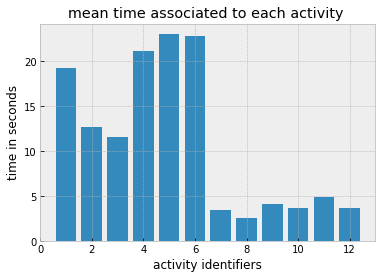

In [46]:
plt.bar(activity_ids,time_per_activity)# plot bar's figure
plt.xlabel('activity identifiers') # Set x axis info
plt.ylabel('time in seconds') # Set y axis info
plt.title('mean time associated to each activity ') # Set the figure's title
plt.show() # showing the figure